# Ford Gobike Dataset Exploration
## by Abdullah

## Preliminary Wrangling

Ford Gobike Datasets a public bicycle sharing system represent trips taken by customers of the Ford Gobike service for the month of Feberaurary of 2019. <br>Currently has over 2,600 bicycles in 262 stations. Datasets consist of 16 columns and 183412 rows

## Assoiacated Variables
<br>duration_sec: Trip Duration (seconds).
<br>start_time: Start Time and Date.
<br>end_time: End Time and Date
<br>start_station_id: Start Station ID
<br>start_station_name: Start Station Name
<br>start_station_latitude: Start Station Latitude
<br>start_station_longitude: Start Station Longitude
<br>end_station_id: End Station ID
<br>end_station_name: End Station Name
<br>end_station_latitude: End Station Latitude
<br>end_station_longitude: End Station Longitude
<br>bike_id: Bike ID
<br>user_type: User Type (Subscriber or Customer)
<br>member_birth_year: Member Year of Birth
<br>member_gender: Member Gender
<br>bike_share_for_all_trip: members  "Bike Share for All" program for low-income residents


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
#read the Ford Gobike dataset
fordgobike_data=pd.read_csv('201902-fordgobike-tripdata.csv')
fordgobike_data.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# numeric varaiables information
fordgobike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
# Shape of the data(no. odf the rows and columns)
fordgobike_data.shape

(183412, 16)

In [6]:
#Check duplicates 
sum(fordgobike_data.duplicated())

0

In [7]:
#Check the Null roes
fordgobike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#Sum of the Null rows
fordgobike_data.isnull().sum().sum()

17318

In [9]:
#Drop the Null rows
fordgobike_data.dropna(axis=0,inplace=True)

In [10]:
fordgobike_data.isnull().sum().sum()

0

In [11]:
fordgobike_data.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [12]:
#Drop the unneceesary Columns for the Visualization 
fordgobike_data.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','bike_id'], axis=1, inplace=True)

In [13]:
fordgobike_data.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,1959.0,Male,No


In [14]:
#Rename the column "bike_share_for_all_trip" to "Enrolled_Bike_Share_Program" to make the name more understandable
fordgobike_data.rename(columns={'bike_share_for_all_trip':'Enrolled_in_Bike_Share_Program'},inplace=True)

In [15]:
fordgobike_data.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,Enrolled_in_Bike_Share_Program
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,1959.0,Male,No


In [16]:
#Check the data types of the variables
fordgobike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   duration_sec                    174952 non-null  int64  
 1   start_time                      174952 non-null  object 
 2   end_time                        174952 non-null  object 
 3   start_station_id                174952 non-null  float64
 4   start_station_name              174952 non-null  object 
 5   end_station_id                  174952 non-null  float64
 6   end_station_name                174952 non-null  object 
 7   user_type                       174952 non-null  object 
 8   member_birth_year               174952 non-null  float64
 9   member_gender                   174952 non-null  object 
 10  Enrolled_in_Bike_Share_Program  174952 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 16.0+ MB


In [17]:
#Change the data type of the variable if required
fordgobike_data['start_time']=fordgobike_data['start_time'].astype('datetime64')
fordgobike_data['end_time']=fordgobike_data['end_time'].astype('datetime64')
fordgobike_data['start_station_id']=fordgobike_data['start_station_id'].astype('int64')
fordgobike_data['end_station_id']=fordgobike_data['end_station_id'].astype('int64')
fordgobike_data['member_birth_year']=fordgobike_data['member_birth_year'].astype('int64')


In [18]:
fordgobike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   duration_sec                    174952 non-null  int64         
 1   start_time                      174952 non-null  datetime64[ns]
 2   end_time                        174952 non-null  datetime64[ns]
 3   start_station_id                174952 non-null  int64         
 4   start_station_name              174952 non-null  object        
 5   end_station_id                  174952 non-null  int64         
 6   end_station_name                174952 non-null  object        
 7   user_type                       174952 non-null  object        
 8   member_birth_year               174952 non-null  int64         
 9   member_gender                   174952 non-null  object        
 10  Enrolled_in_Bike_Share_Program  174952 non-null  object 

In [19]:
#Create a new variable with the member_age instead of the birth_year to see easier how affect the member_age
fordgobike_data['member_age']=2021-fordgobike_data['member_birth_year']

In [20]:
fordgobike_data['member_age']

0         37
2         49
3         32
4         47
5         62
          ..
183407    25
183408    37
183409    31
183410    33
183411    32
Name: member_age, Length: 174952, dtype: int64

In [21]:
fordgobike_data.start_station_name.nunique()

329

In [22]:
fordgobike_data.member_gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [23]:
fordgobike_data['member_age'].value_counts()

33     10214
28      9323
32      8967
31      8640
30      8484
       ...  
94         1
93         1
111        1
91         1
143        1
Name: member_age, Length: 75, dtype: int64

In [24]:
#Check the number of value in the member_gender
fordgobike_data['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [25]:
fordgobike_data['Enrolled_in_Bike_Share_Program'].value_counts()

No     157606
Yes     17346
Name: Enrolled_in_Bike_Share_Program, dtype: int64

In [26]:
#Sort the start_time variable to check the first day and the last day of which data are collected
fordgobike_data_sorted_date=fordgobike_data.sort_values('start_time')

In [27]:
fordgobike_data_sorted_date.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,Enrolled_in_Bike_Share_Program,member_age
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24,Spear St at Folsom St,37,2nd St at Folsom St,Subscriber,1989,Male,No,32
183406,706,2019-02-01 00:04:40.616,2019-02-01 00:16:27.080,138,Jersey St at Church St,78,Folsom St at 9th St,Subscriber,1988,Male,No,33
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,324,Union Square (Powell St at Post St),Subscriber,1996,Male,No,25
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,216,San Pablo Ave at 27th St,Subscriber,1988,Male,No,33
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),66,3rd St at Townsend St,Subscriber,1984,Male,No,37


In [28]:
fordgobike_data_sorted_date.tail(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,Enrolled_in_Bike_Share_Program,member_age
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,312,San Jose Diridon Station,Subscriber,1983,Female,No,38
14,395,2019-02-28 23:56:26.848,2019-03-01 00:03:01.947,243,Bancroft Way at College Ave,252,Channing Way at Shattuck Ave,Subscriber,1988,Male,No,33
11,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44,Civic Center/UN Plaza BART Station (Market St ...,343,Bryant St at 2nd St,Subscriber,1993,Male,No,28
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370,Jones St at Post St,43,San Francisco Public Library (Grove St at Hyde...,Subscriber,1996,Female,Yes,25
15,208,2019-02-28 23:59:18.548,2019-03-01 00:02:47.228,349,Howard St at Mary St,60,8th St at Ringold St,Subscriber,1993,Male,Yes,28


In [29]:
# First day 
fordgobike_data_sorted_date[:1]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,Enrolled_in_Bike_Share_Program,member_age
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24,Spear St at Folsom St,37,2nd St at Folsom St,Subscriber,1989,Male,No,32


In [30]:
# Last day
fordgobike_data_sorted_date[-1:]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,Enrolled_in_Bike_Share_Program,member_age
15,208,2019-02-28 23:59:18.548,2019-03-01 00:02:47.228,349,Howard St at Mary St,60,8th St at Ringold St,Subscriber,1993,Male,Yes,28


In [31]:
print(fordgobike_data['start_time'][0].date())

2019-02-28


In [32]:
len(fordgobike_data)

174952

In [33]:
# Seperate the start time and creat a new variable with the start date
fordgobike_data['start_day']=fordgobike_data['start_time'].dt.day

In [34]:
#Change the data type of the start_day to intger
fordgobike_data['start_day']=fordgobike_data['start_day'].astype('int64')


In [35]:
fordgobike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   duration_sec                    174952 non-null  int64         
 1   start_time                      174952 non-null  datetime64[ns]
 2   end_time                        174952 non-null  datetime64[ns]
 3   start_station_id                174952 non-null  int64         
 4   start_station_name              174952 non-null  object        
 5   end_station_id                  174952 non-null  int64         
 6   end_station_name                174952 non-null  object        
 7   user_type                       174952 non-null  object        
 8   member_birth_year               174952 non-null  int64         
 9   member_gender                   174952 non-null  object        
 10  Enrolled_in_Bike_Share_Program  174952 non-null  object 

In [36]:
# Function to check if the user rent the bike in the weekend or not 
def Weekend(fordgobike_data):
    if fordgobike_data['start_day'] == 2 or fordgobike_data['start_day']== 3 or fordgobike_data['start_day']== 9 or fordgobike_data['start_day']== 10 or  fordgobike_data['start_day']==16 or  fordgobike_data['start_day']==17 or  fordgobike_data['start_day']==23 or  fordgobike_data['start_day']==24:
        return 'Yes'
    else:
        return 'No'
        


In [37]:
# Apply the function in the new variable weekend
fordgobike_data['Weekend'] = fordgobike_data.apply(Weekend, axis=1)

In [38]:
fordgobike_data.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,Enrolled_in_Bike_Share_Program,member_age,start_day,Weekend
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,No,37,28,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,49,28,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,Subscriber,1989,Other,No,32,28,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,Subscriber,1974,Male,Yes,47,28,No
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,Subscriber,1959,Male,No,62,28,No


In [39]:
fordgobike_data['Weekend'].value_counts()

No     146026
Yes     28926
Name: Weekend, dtype: int64

In [40]:
# Function to determine the day that user start their ride
def Weekday(fordgobike_data):
    if fordgobike_data['start_day'] == 4 or fordgobike_data['start_day']== 11 or fordgobike_data['start_day']== 18 or fordgobike_data['start_day']== 25 :
        return 'Monday'    
    elif fordgobike_data['start_day'] == 5 or fordgobike_data['start_day']== 12 or fordgobike_data['start_day']== 19 or fordgobike_data['start_day']== 26:
        return 'Tuesday'
    elif fordgobike_data['start_day'] == 6 or fordgobike_data['start_day']== 13 or fordgobike_data['start_day']== 20 or fordgobike_data['start_day']== 27:
        return 'Wednesday'

    elif fordgobike_data['start_day'] == 7 or fordgobike_data['start_day']== 14 or fordgobike_data['start_day']== 21 or fordgobike_data['start_day']== 28:
        return 'Thursday'

    elif fordgobike_data['start_day'] == 1 or fordgobike_data['start_day']== 8 or fordgobike_data['start_day']== 15 or fordgobike_data['start_day']== 22:
        return 'Friday'
        
    elif fordgobike_data['start_day'] == 2 or fordgobike_data['start_day']== 9 or fordgobike_data['start_day']== 16 or fordgobike_data['start_day']== 23:
        return 'Saturday'
        
    elif fordgobike_data['start_day'] == 3 or fordgobike_data['start_day']== 10 or fordgobike_data['start_day']== 17 or fordgobike_data['start_day']== 24:
        return 'Sunday'


In [41]:
# Apply the function
fordgobike_data['weekday'] = fordgobike_data.apply(Weekday, axis=1)

In [42]:
fordgobike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,Enrolled_in_Bike_Share_Program,member_age,start_day,Weekend,weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,No,37,28,No,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,49,28,No,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,Subscriber,1989,Other,No,32,28,No,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,Subscriber,1974,Male,Yes,47,28,No,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,Subscriber,1959,Male,No,62,28,No,Thursday


In [43]:
fordgobike_data['weekday'].value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: weekday, dtype: int64

### What is the structure of your dataset?
The main dataset consists of 16 cloumns and 183412 rows after adding three new columns which are the member_age, weekend, weekday and removing the start_station_latitude , start_station_longitude , 
end_station_latitude,end_station_longitude, bike_id columns to help during the investigation of the features.

### What is/are the main feature(s) of interest in your dataset?
There are more than one feature that I'm intersted to see how it will affect the duration of the rent duration such as the member_gender, member_age, Enrolled_in_Bike_Share_Program and if the rent period in the weekend or not.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
user_type, member_age and duration



## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

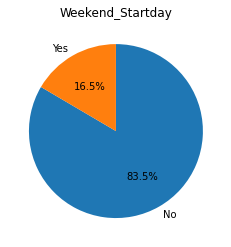

In [73]:
sorted_counts =fordgobike_data['Weekend'].value_counts()
plt.pie(sorted_counts ,labels=sorted_counts.index,autopct='%1.1f%%',startangle=90 , counterclock = False)
plt.title('Weekend_Startday');

#### Only 16.5 precent of the users started their riding in the weekend and the other during druing the week, That was not expecting as the people in the weekend have more time.

##    

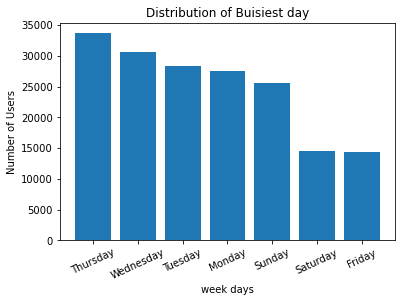

In [75]:
x=fordgobike_data['weekday'].unique()
y=fordgobike_data['weekday'].value_counts()
plt.bar(x,y)
plt.xlabel('week days')
plt.ylabel('Number of Users')
plt.title('Distribution of Buisiest day')
plt.xticks(rotation=25);


#### The busiest day is Thursday which more users choosed this dayh to start their riding.

##  

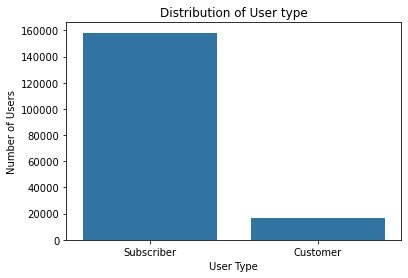

In [76]:
color = sb.color_palette()[0]
order=fordgobike_data['user_type'].value_counts().index
sb.countplot(data=fordgobike_data,x='user_type',color=color,order=order)
plt.title('Distribution of User type')
plt.xlabel('User Type')
plt.ylabel('Number of Users');


#### There is a huge difference between the between  the number of Subscriber users and Customer users as was expected

##    

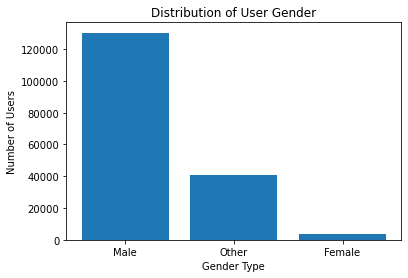

In [77]:
x=fordgobike_data['member_gender'].unique()
y=fordgobike_data['member_gender'].value_counts()
plt.bar(x,y)
plt.title('Distribution of User Gender')
plt.xlabel('Gender Type')
plt.ylabel('Number of Users');

#### Most of the Users are Males

##  

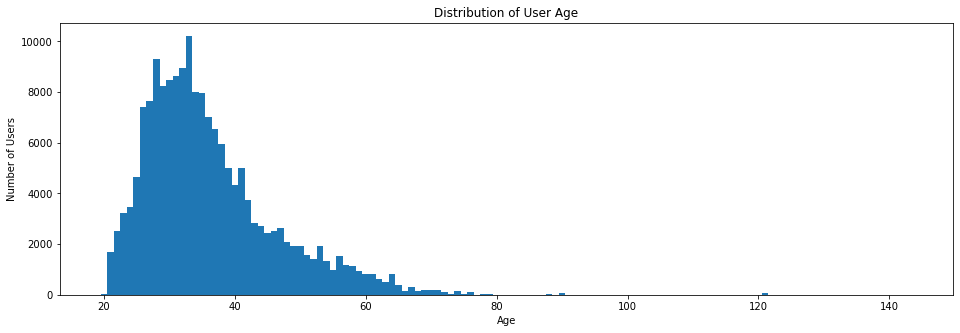

In [48]:
plt.figure(figsize=[16, 5])
plt.bar(data = fordgobike_data, x = fordgobike_data['member_age'].value_counts().keys(), height=fordgobike_data['member_age'].value_counts(),width=1)
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

#### Most of the age user's are between 20 and 40 years old as was expected there are some outliner at 90 and 122 years old

##  

In [49]:
#Remove the outliner any age over 80 years old
fordgobike_data.drop(fordgobike_data[fordgobike_data.member_age>80].index,inplace=True)

In [50]:
fordgobike_data.describe()

,duration_sec,start_station_id,end_station_id,member_birth_year,member_age,start_day
count,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000
mean,704.300563,139.024092,136.643683,1984.877665,36.122335,15.309999
std,1643.075498,111.651112,111.352470,9.871342,9.871342,8.034907
min,61.000000,3.000000,3.000000,1941.000000,20.000000,1.000000
25%,323.000000,47.000000,44.000000,1980.000000,29.000000,8.000000
50%,511.000000,104.000000,101.000000,1987.000000,34.000000,15.000000
75%,789.000000,239.000000,238.000000,1992.000000,41.000000,22.000000
max,84548.000000,398.000000,398.000000,2001.000000,80.000000,28.000000


##  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Yes during the investigations of Distribution of User Age I found some outliner of users age at 120 and 90 years old Which is unreal that peole above 80 years old are still riding a bike so I decided to remove any age above 80 years old so we have more accurate dataset.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes during the investigation of the buisiest day and startdate weekend I was expectiong users will ride more at the weekwnd not during the week days and exactly thursday, also I thought that the will be no high difference of the gender user between Male and Female.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [51]:
fordgobike_data

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,Enrolled_in_Bike_Share_Program,member_age,start_day,Weekend,weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,No,37,28,No,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,49,28,No,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,Subscriber,1989,Other,No,32,28,No,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,Subscriber,1974,Male,Yes,47,28,No,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,Subscriber,1959,Male,No,62,28,No,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,324,Union Square (Powell St at Post St),Subscriber,1996,Male,No,25,1,No,Friday
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),66,3rd St at Townsend St,Subscriber,1984,Male,No,37,1,No,Friday
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,277,Morrison Ave at Julian St,Subscriber,1990,Male,Yes,31,1,No,Friday
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,216,San Pablo Ave at 27th St,Subscriber,1988,Male,No,33,1,No,Friday


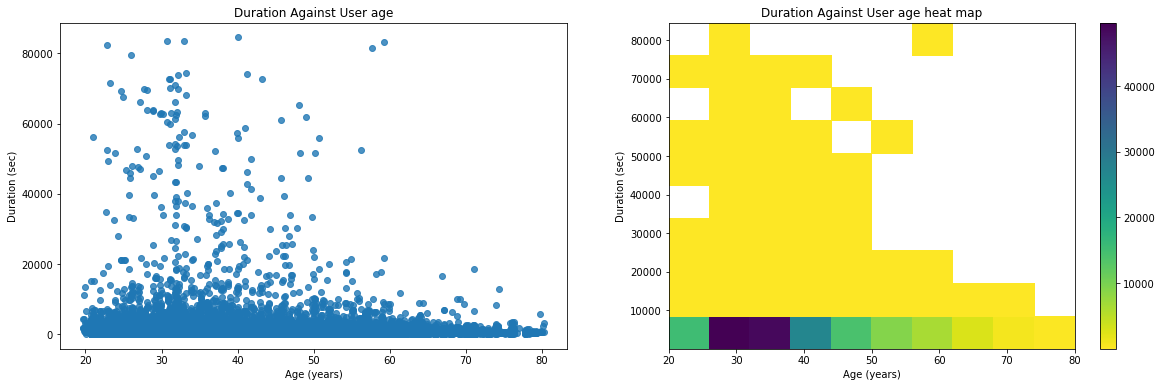

In [79]:
plt.figure(figsize=[20, 6])
plt.subplot(1, 2, 1)
sb.regplot(data=fordgobike_data,x='member_age',y='duration_sec',fit_reg=False,truncate=False, x_jitter=0.3)
plt.title('Duration Against User age')
plt.xlabel('Age (years)')
plt.ylabel('Duration (sec)');


plt.subplot(1, 2, 2)
plt.hist2d(data = fordgobike_data, x = 'member_age', y = 'duration_sec', cmin=2, cmap='viridis_r')
plt.colorbar()
plt.title('Duration Against User age heat map');
plt.xlabel('Age (years)')
plt.ylabel('Duration (sec)');


#### As most of the durations are below 6000 and age is below 80

##  

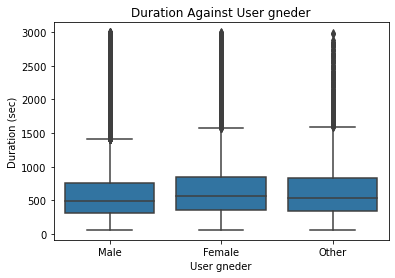

In [53]:
color = sb.color_palette()[0]
fordgobike_data_Less=fordgobike_data.query('duration_sec<3000')
sb.boxplot(data=fordgobike_data_Less, x='member_gender', y='duration_sec', color =color)
plt.xlabel('User gneder')
plt.ylabel('Duration (sec)')
plt.title('Duration Against User gneder');

#### In the previous investigation it shwon that 75% of Users were male but the trip duation looks similar for the three genders with a median around 500 sec

##  

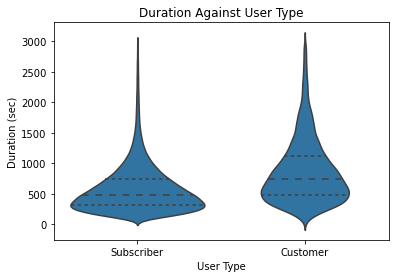

In [54]:
# plot relationship between user type and duration
sb.violinplot(data=fordgobike_data_Less, x='user_type', y='duration_sec', color=color, inner='quartile')
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.title('Duration Against User Type');

#### Customer users seems they ride the bikes more time than Suscribers.

##  

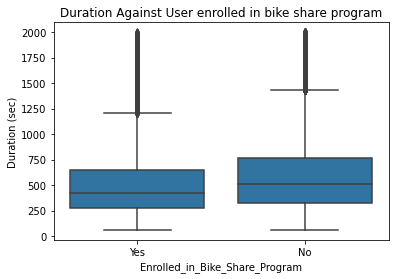

In [70]:
fordgobike_data_Less2=fordgobike_data.query('duration_sec<2000')
sb.boxplot(data=fordgobike_data_Less2, x='Enrolled_in_Bike_Share_Program', y='duration_sec', color =color)
plt.xlabel('Enrolled_in_Bike_Share_Program')
plt.ylabel('Duration (sec)')
plt.title('Duration Against User enrolled in bike share program');

#### Enrolled in bike share programm doesn't encourage users to ride more their bikes.

##  

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

During the investigation the relationship between tha User Age and the duration of the trip as was expecting the Users age between 20 and 40 has more trip duration. For user type the trip duration does not seem to differ between Female, Male, and Other. Customer users seems they ride the bikes more time than Suscribers users.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is an interesting relationship between the users enrolled in share bike programm and not. It seems that enrolled in bike share programm doesn't encourage users to ride more their bikes

In [55]:
fordgobike_data

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,Enrolled_in_Bike_Share_Program,member_age,start_day,Weekend,weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,No,37,28,No,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,49,28,No,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,Subscriber,1989,Other,No,32,28,No,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,Subscriber,1974,Male,Yes,47,28,No,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,Subscriber,1959,Male,No,62,28,No,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,324,Union Square (Powell St at Post St),Subscriber,1996,Male,No,25,1,No,Friday
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),66,3rd St at Townsend St,Subscriber,1984,Male,No,37,1,No,Friday
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,277,Morrison Ave at Julian St,Subscriber,1990,Male,Yes,31,1,No,Friday
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,216,San Pablo Ave at 27th St,Subscriber,1988,Male,No,33,1,No,Friday


In [93]:
np.random.seed(2121)
fordgobike_data_columns=['duration_sec','user_type','member_age']
fordgobike_data_sample=np.random.choice(fordgobike_data.shape[0],200,replace=False)
fordgobike_data_subset=fordgobike_data.reindex(columns =fordgobike_data_columns)


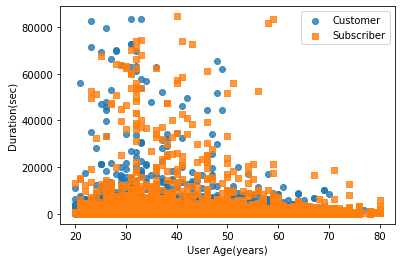

In [94]:
user_type = [['Customer', 'o'],
               ['Subscriber', 's']]

for ttype, marker in user_type:
    plot_data = fordgobike_data_subset.loc[fordgobike_data_subset['user_type']==ttype]
    sb.regplot(data = plot_data, x = 'member_age', y = 'duration_sec',fit_reg=False, marker = marker)
    
plt.legend(['Customer','Subscriber'])
plt.xlabel('User Age(years)')
plt.ylabel('Duration(sec)');

#### Both Customer users and Suscriber User showing similar distribution of the age and as expected Suscriber represent more Users than Customers

##  

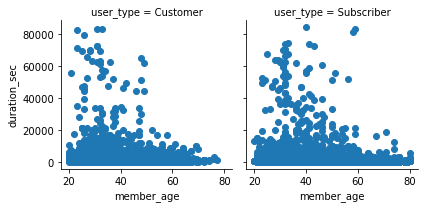

In [87]:
graph = sb.FacetGrid(data = fordgobike_data, col = 'user_type')
graph.map(plt.scatter, 'member_age','duration_sec');

#### Seperate the two User types into different graph for better visualization.

##  

In [96]:
np.random.seed(2121)
fordgobike_data_columns=['duration_sec','member_gender','member_age']
fordgobike_data_sample=np.random.choice(fordgobike_data.shape[0],200,replace=False)
fordgobike_data_subset=fordgobike_data.reindex(columns =fordgobike_data_columns)

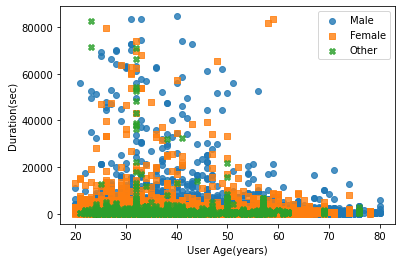

In [97]:
member_gender = [['Male', 'o'],
             ['Female', 's'],
             ['Other','X']]

for ttype, marker in member_gender:
    plot_data = fordgobike_data_subset.loc[fordgobike_data_subset['member_gender']==ttype]
    sb.regplot(data = plot_data, x = 'member_age', y = 'duration_sec',fit_reg=False, marker = marker)
    
plt.legend(['Male','Female','Other'])
plt.xlabel('User Age(years)')
plt.ylabel('Duration(sec)');

#### It seems that the Men gender at age between 20 and 50 yers old spent more time in their bike trip than Female gender at the same age period

##  

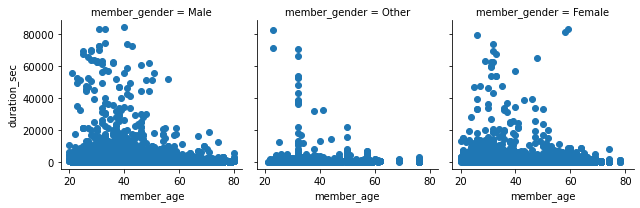

In [91]:
graph2 = sb.FacetGrid(data = fordgobike_data, col = 'member_gender')
graph2.map(plt.scatter, 'member_age','duration_sec');

#### seperate the three graphs to see the visualsation better

##  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Men gender at age between 20 and 50 yers old spent more time in their bike trip than Female gender at the same age period.

### Were there any interesting or surprising interactions between features?

It was suprising that only 16.5 precent of the users started their riding in the weekend and enrolled in bike share programm doesn't encourage users to use more bikes.